In [1]:
cd /content/drive/My Drive/Dava with ML

/content/drive/My Drive/Dava with ML


In [ ]:
!unzip heart-disease-uci.zip

Archive:  heart-disease-uci.zip
replace heart.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as m

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
ls

 breast-cancer-wisconsin-data.zip   heart.ipynb
 Cancer.ipynb                       hepatiits_dataset.zip
 cardiovaskular_dataset.zip         hepatities.ipynb
 chronic-kidney-disease.zip         hepatitisdata.csv
'covid pnemonia.ipynb'              indian_liver_patient.csv
 data.csv                           indian-liver-patient-records.zip
 Dataset_spine.csv                  kidney.ipynb
 dataset.zip                        liver.ipynb
 degree_cancer_5.tflite             model_cancer5.h5
 degree_cancer_8.tflite             model_covid.h5
 degree_covid_mobilenet.tflite      model_diabeties.h5
 degree_covid.tflite                new_model.csv
 degree_covid_vgg.tflite            parkinson_dataset.zip
 degree_diabeties.tflite            Parkinson.ipynb
 degree_heart.tflite                pd_speech_features.csv
 degree_kidney.tflite               pima-indians-diabetes-database.zip
 degree_liver.tflite                saved_model_cancer_5.pbtxt/
 degreeliver.tflite                 saved_model

In [4]:
dataset=pd.read_csv('heart.csv')
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
dataset.isnull().values.any()

False

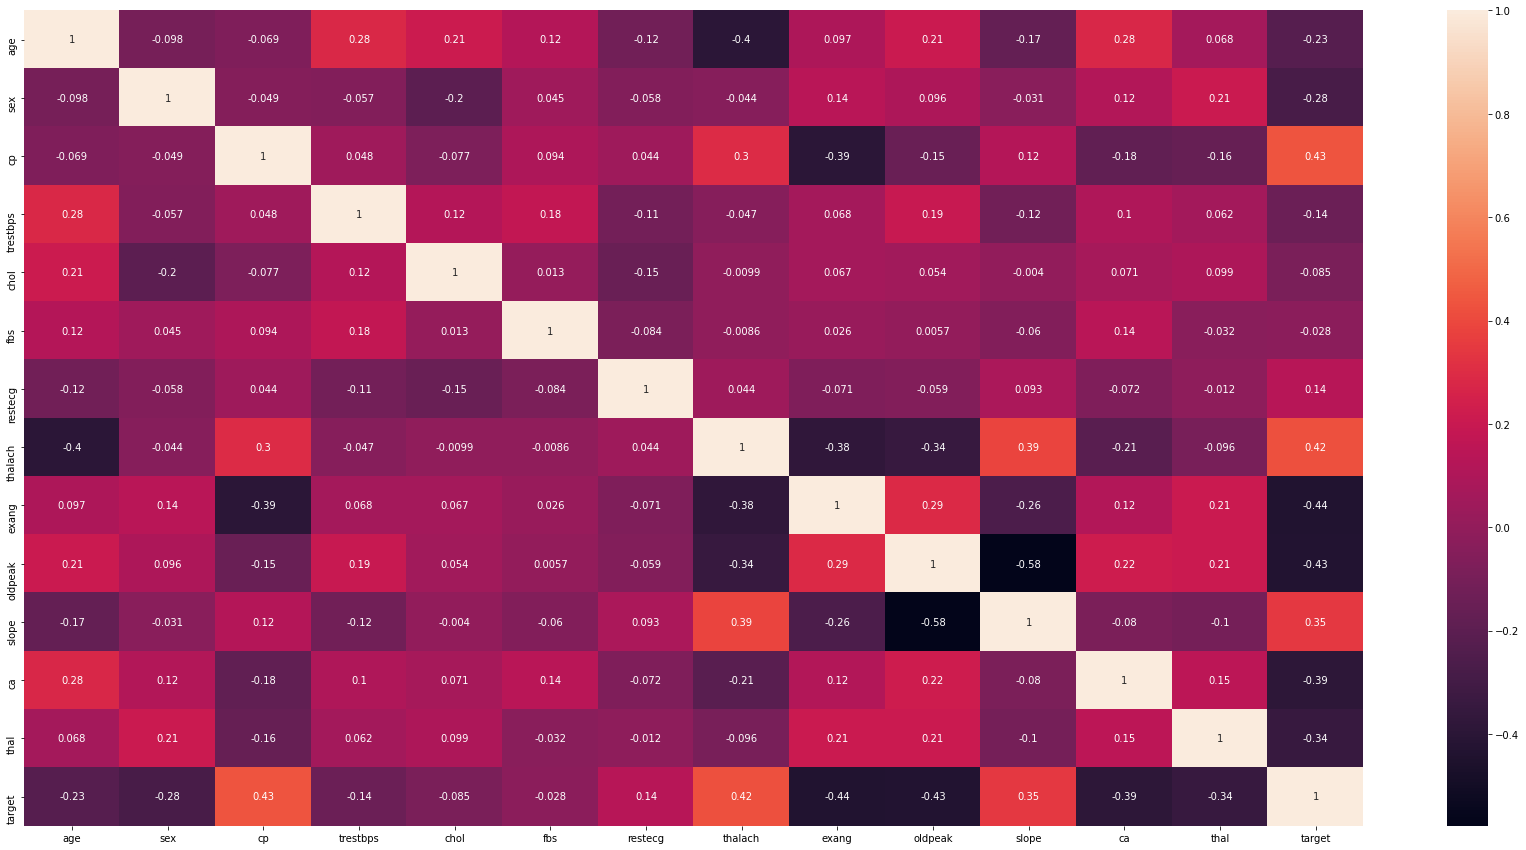

In [6]:
plt.figure(figsize=(30,15))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

In [7]:
#dataset=dataset.drop('slope',axis=1)

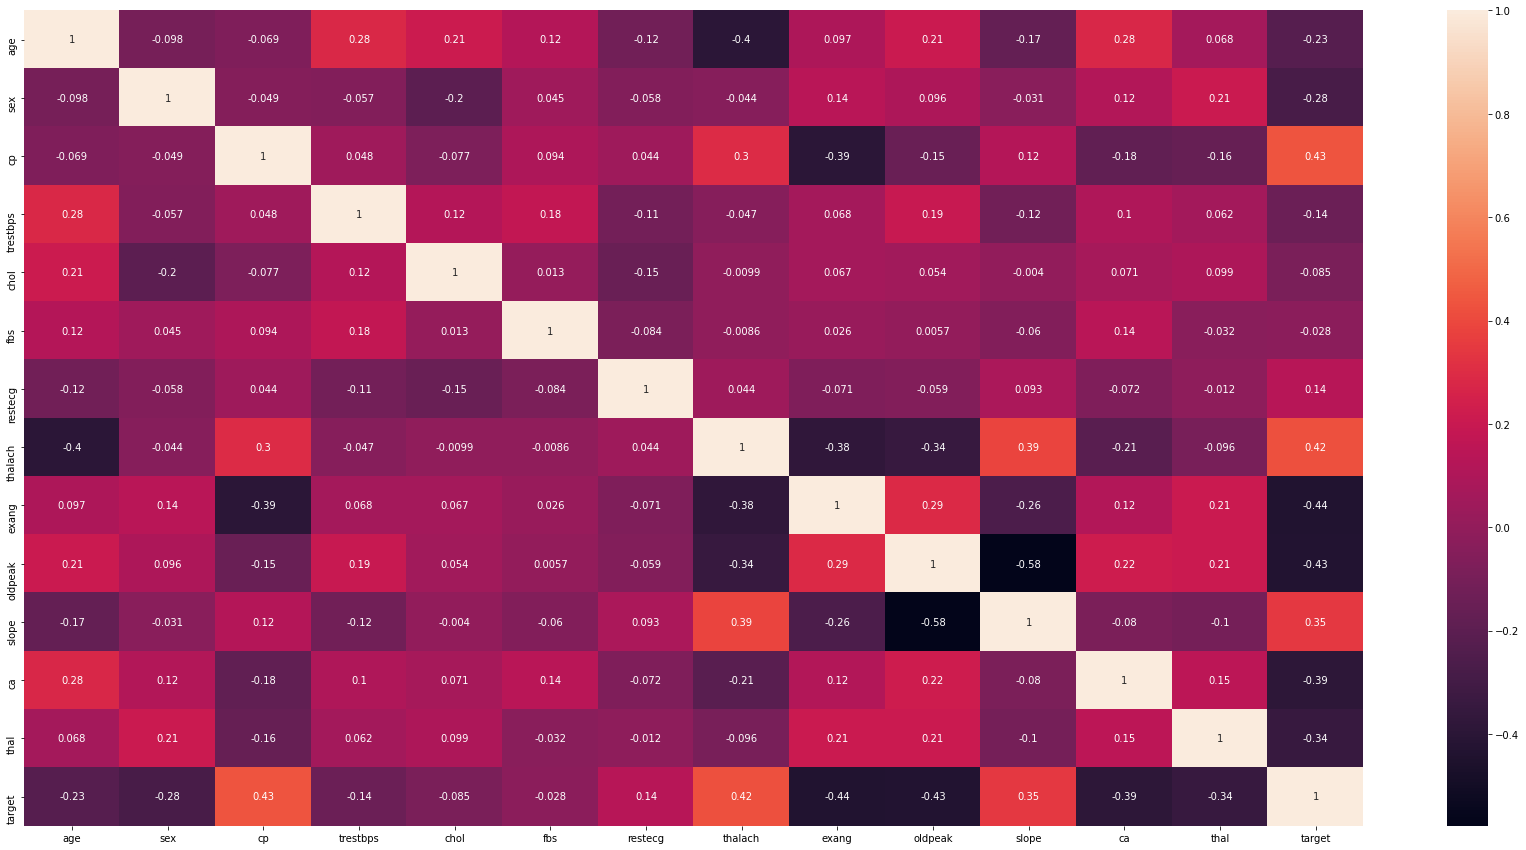

In [8]:
plt.figure(figsize=(30,15))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

In [9]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Spliting data

In [10]:
features=dataset.iloc[:,:-1]
labels=dataset.iloc[:,[-1]]

In [11]:
features

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [12]:
feature_train,feature_test,label_train,label_test=train_test_split(features,labels,test_size=0.2,random_state=42)

Logistic Regression

In [ ]:
model=LogisticRegression(max_iter=1000)
model.fit(feature_train,label_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
label_pred=model.predict(feature_test)

In [ ]:
m.accuracy_score(label_test,label_pred)

0.8524590163934426

In [ ]:
label_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
label_test

,target
179,0
228,0
111,1
246,0
60,1
...,...
249,0
104,1
300,0
193,0


In [ ]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [ ]:
print(m.confusion_matrix(label_test,label_pred))

[[25  4]
 [ 5 27]]


##KNN

In [ ]:
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
param={'n_neighbors':list(np.arange(1,20))}


In [ ]:
model=GridSearchCV(knn,param_grid=param)
model.fit(feature_train,label_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
model.best_params_

{'n_neighbors': 3}

In [ ]:
model=KNeighborsClassifier(n_neighbors=13)
model.fit(feature_train,label_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [ ]:
label_pred=model.predict(feature_test)

In [ ]:
m.accuracy_score(label_test,label_pred)

0.7377049180327869

In [ ]:
label_pred_train=model.predict(feature_train)

In [ ]:
m.accuracy_score(label_train,label_pred_train)

0.6900826446280992

In [ ]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           0       0.74      0.69      0.71        29
           1       0.74      0.78      0.76        32

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



In [ ]:
print(m.confusion_matrix(label_test,label_pred))

[[20  9]
 [ 7 25]]


In [ ]:
label_pred

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1])

In [ ]:
label_test

,target
179,0
228,0
111,1
246,0
60,1
...,...
249,0
104,1
300,0
193,0


##Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV
dt=DecisionTreeClassifier()
param={'max_depth':list(np.arange(1,20))}


In [ ]:
model=GridSearchCV(dt,param_grid=param)
model.fit(feature_train,label_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1

In [ ]:
model.best_params_

{'max_depth': 15}

In [ ]:
model=DecisionTreeClassifier(max_depth=8)
model.fit(feature_train,label_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
label_pred=model.predict(feature_test)

In [ ]:
m.accuracy_score(label_test,label_pred)

0.8524590163934426

In [ ]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86        29
           1       0.93      0.78      0.85        32

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



In [ ]:
print(m.confusion_matrix(label_test,label_pred))

[[27  2]
 [ 7 25]]


In [ ]:
label_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
label_test

,target
179,0
228,0
111,1
246,0
60,1
...,...
249,0
104,1
300,0
193,0


##SVM

In [ ]:
model=SVC(kernel='linear')
model.fit(feature_train,label_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
label_pred=model.predict(feature_test)

In [ ]:
m.accuracy_score(label_test,label_pred)

0.8688524590163934

In [ ]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [ ]:
print(m.confusion_matrix(label_test,label_pred))

[[25  4]
 [ 4 28]]


In [ ]:
label_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
label_test

,target
179,0
228,0
111,1
246,0
60,1
...,...
249,0
104,1
300,0
193,0


##Random Forest Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
param={'n_estimators':[10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200],'max_depth':list(np.arange(1,20))}


In [ ]:
model=GridSearchCV(rfc,param_grid=param)
model.fit(feature_train,label_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

KeyboardInterrupt: ignored

In [ ]:
model.best_params_

In [ ]:
model=model.best_estimator_

In [ ]:
label_pred=model.predict(feature_test)

In [ ]:
m.accuracy_score(label_test,label_pred)

In [ ]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [ ]:
print(m.confusion_matrix(label_test,label_pred))

[[26  3]
 [ 5 27]]


In [ ]:
label_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
label_test

,target
179,0
228,0
111,1
246,0
60,1
...,...
249,0
104,1
300,0
193,0


#Neural Network

In [13]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [14]:
from keras.utils.np_utils import to_categorical
label_train=to_categorical(label_train)
label_test=to_categorical(label_test)

In [15]:
feature_train.shape

(242, 13)

In [16]:
model=Sequential()
model.add(Dense(100,input_shape=[13],activation='relu'))
model.add(Dense(2,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1400      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 202       
Total params: 1,602
Trainable params: 1,602
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(feature_train,label_train,epochs=500)

Epoch 1/500
8/8 [==============================] - 0s 4ms/step - loss: 5.7549 - accuracy: 0.4876
Epoch 2/500
8/8 [==============================] - 0s 3ms/step - loss: 2.5920 - accuracy: 0.5661
Epoch 3/500
8/8 [==============================] - 0s 4ms/step - loss: 1.6565 - accuracy: 0.6074
Epoch 4/500
8/8 [==============================] - 0s 3ms/step - loss: 1.2454 - accuracy: 0.6736
Epoch 5/500
8/8 [==============================] - 0s 3ms/step - loss: 1.1122 - accuracy: 0.6322
Epoch 6/500
8/8 [==============================] - 0s 3ms/step - loss: 1.1133 - accuracy: 0.6612
Epoch 7/500
8/8 [==============================] - 0s 4ms/step - loss: 1.0335 - accuracy: 0.6694
Epoch 8/500
8/8 [==============================] - 0s 3ms/step - loss: 0.9453 - accuracy: 0.7066
Epoch 9/500
8/8 [==============================] - 0s 3ms/step - loss: 0.8946 - accuracy: 0.6983
Epoch 10/500
8/8 [==============================] - 0s 3ms/step - loss: 0.9181 - accuracy: 0.6818
Epoch 11/500
8/8 [===========

In [19]:
label_pred=model.predict(feature_test)

In [20]:
label_pred

array([[9.09139454e-01, 9.78897586e-02],
       [1.52728051e-01, 8.75389516e-01],
       [2.54264742e-04, 9.96440113e-01],
       [8.43079209e-01, 1.50141984e-01],
       [2.00974736e-02, 9.81303036e-01],
       [8.26494768e-03, 9.84614432e-01],
       [3.62604946e-01, 6.91352189e-01],
       [9.99997616e-01, 8.24448193e-07],
       [9.98214006e-01, 1.73115381e-03],
       [6.83321595e-01, 3.74289632e-01],
       [2.84467340e-01, 7.61313021e-01],
       [8.94813418e-01, 1.01523750e-01],
       [4.06377614e-02, 9.66048658e-01],
       [9.83685553e-01, 1.46180596e-02],
       [2.28466978e-03, 9.98021603e-01],
       [7.64456159e-03, 9.95165348e-01],
       [4.10302571e-04, 9.99549091e-01],
       [8.32449853e-01, 2.06564397e-01],
       [9.98336554e-01, 1.90024078e-03],
       [9.99233365e-01, 4.70118073e-04],
       [2.61483341e-01, 7.53303766e-01],
       [9.93090451e-01, 6.55272324e-03],
       [6.65927768e-01, 3.58447880e-01],
       [8.13149735e-02, 9.37546372e-01],
       [7.251493

In [21]:
label_pred=np.argmax(label_pred,axis=1)

In [22]:
label_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [23]:
label_test=np.argmax(label_test,axis=1)
label_train=np.argmax(label_train,axis=1)

In [24]:
m.accuracy_score(label_test,label_pred)

0.8688524590163934

In [25]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [26]:
print(m.confusion_matrix(label_test,label_pred))

[[25  4]
 [ 4 28]]


In [27]:
label_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [28]:
label_test

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [29]:
import tensorflow



In [30]:
model.save('model_heart.h5')

In [31]:
# We need to create a TFLite Converter Object from model we created

converter = tensorflow.lite.TFLiteConverter.from_keras_model(model=model)

In [32]:
# Create a tflite model object from TFLite Converter

tfmodel = converter.convert()

# Save TFLite model into a .tflite file 

open("degree_heart.tflite","wb").write(tfmodel)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /tmp/tmpud6od22v/assets


7700